In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read Athlete
athlete = pd.read_csv('athlete_events.csv')

In [3]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
#Filter Summer olympics
summer=athlete[athlete['Season'] == 'Summer']

In [6]:
summer['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896])

In [7]:
#List of cities that had hosted the summer olympics
hosts=(
    summer
    .groupby('Year')['City']
    .unique()
)
hosts=list(hosts)
cities_hosting = []
for host in hosts:
    cities_hosting.append(host[0])
    
cities_hosting

['Athina',
 'Paris',
 'St. Louis',
 'Athina',
 'London',
 'Stockholm',
 'Antwerpen',
 'Paris',
 'Amsterdam',
 'Los Angeles',
 'Berlin',
 'London',
 'Helsinki',
 'Melbourne',
 'Roma',
 'Tokyo',
 'Mexico City',
 'Munich',
 'Montreal',
 'Moskva',
 'Los Angeles',
 'Seoul',
 'Barcelona',
 'Atlanta',
 'Sydney',
 'Athina',
 'Beijing',
 'London',
 'Rio de Janeiro']

In [8]:
#3 Dataframe filtering gold, silver and bronze
summer_gold_winners=summer[summer['Medal']=='Gold']
summer_silver_winners=summer[summer['Medal']=='Silver']
summer_bronze_winners=summer[summer['Medal']=='Bronze']

In [9]:
#Sort of Summer Olympics by gold
medals_gold=(
    summer_gold_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)
    .groupby('Year')
    .head(3)
    .reset_index(drop=True)
    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

medals_gold=medals_gold.rename(columns = {'Event':'Gold'})
# print(medals_gold)

medals_guia = medals_gold.drop('Gold',axis=1)


In [10]:
#Sort of silver medals
medals_silver=(
    summer_silver_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

medals_silver=medals_silver.rename(columns = {'Event':'Silver'})

keys = list(medals_guia.columns.values)
i1 = medals_silver.set_index(keys).index
i2 = medals_guia.set_index(keys).index
medals_silver_guia=medals_silver[i1.isin(i2)]
medals_silver_guia=medals_silver_guia.reset_index(drop=True)
# medals_silver_guia

In [11]:
#Bronze medals
medals_bronze=(
    summer_bronze_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

medals_bronze=medals_bronze.rename(columns = {'Event':'Bronze'})

keys = list(medals_guia.columns.values)
i1 = medals_bronze.set_index(keys).index
i2 = medals_guia.set_index(keys).index
medals_bronze_guia=medals_bronze[i1.isin(i2)]

medals_bronze_guia=medals_bronze_guia.reset_index(drop=True)
# medals_bronze_guia

In [12]:
#FINAL DATAFRAME WITH the top 3 finalists of the medal table of summer olympics through time
medallero=medals_gold.merge(medals_silver_guia,on=['Year','NOC'],how='outer').merge(medals_bronze_guia,on=['Year','NOC'],how='outer').fillna(0)
# print(medallero)
medallero['Silver']=medallero['Silver'].astype(int)
medallero['Bronze']=medallero['Bronze'].astype(int)
# print(medallero)

In [13]:
#Sorted Dataframe
medallero = medallero.sort_values(by = ['Year','Gold','Silver','Bronze'],ascending = False)

In [16]:
#Create lists or arrays of all the top3 finishers through time for plotting
ganadores=(
    medallero
    .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

number_first_places_gold=[]
number_second_places_gold=[]
number_third_places_gold=[]

number_first_places_silver=[]
number_second_places_silver=[]
number_third_places_silver=[]

number_first_places_bronze=[]
number_second_places_bronze=[]
number_third_places_bronze=[]

names_first_places=[]
names_second_places=[]
names_third_places=[]

years=[]

for year in ganadores:
    print(year[1])
    years.append(year[0])
    names_first_places.append(year[1].iloc[0,1])
    names_second_places.append(year[1].iloc[1,1])
    names_third_places.append(year[1].iloc[2,1])
    number_first_places_gold.append(year[1].iloc[0,2])
    number_second_places_gold.append(year[1].iloc[1,2])
    number_third_places_gold.append(year[1].iloc[2,2])
    number_first_places_silver.append(year[1].iloc[0,3])
    number_second_places_silver.append(year[1].iloc[1,3])
    number_third_places_silver.append(year[1].iloc[2,3])
    number_first_places_bronze.append(year[1].iloc[0,4])
    number_second_places_bronze.append(year[1].iloc[1,4])
    number_third_places_bronze.append(year[1].iloc[2,4])
    

    Year  NOC  Gold  Silver  Bronze
84  1896  USA    11       6       2
85  1896  GRE    10      17      17
86  1896  GER     7       5       2
    Year  NOC  Gold  Silver  Bronze
81  1900  FRA    28      40      34
82  1900  USA    21      16      17
83  1900  GBR    19      11      12
    Year  NOC  Gold  Silver  Bronze
78  1904  USA    76      79      75
79  1904  CAN     4       1       1
80  1904  CUB     4       0       0
    Year  NOC  Gold  Silver  Bronze
75  1906  FRA    15      10      16
76  1906  USA    12       5       6
77  1906  GBR     8      12       5
    Year  NOC  Gold  Silver  Bronze
72  1908  GBR    56      50      37
73  1908  USA    22      12      12
74  1908  SWE     8       6      11
    Year  NOC  Gold  Silver  Bronze
69  1912  USA    26      18      19
70  1912  SWE    24      24      17
71  1912  GBR    10      15      16
    Year  NOC  Gold  Silver  Bronze
66  1920  USA    41      27      27
67  1920  SWE    19      20      25
68  1920  BEL    16      12 

In [17]:
#Labels of the final graph
labels_graph = []
for i in range(0,len(years)):
    text = str(years[i])+ '\n' + cities_hosting[i]
    labels_graph.append(text)

# labels_graph

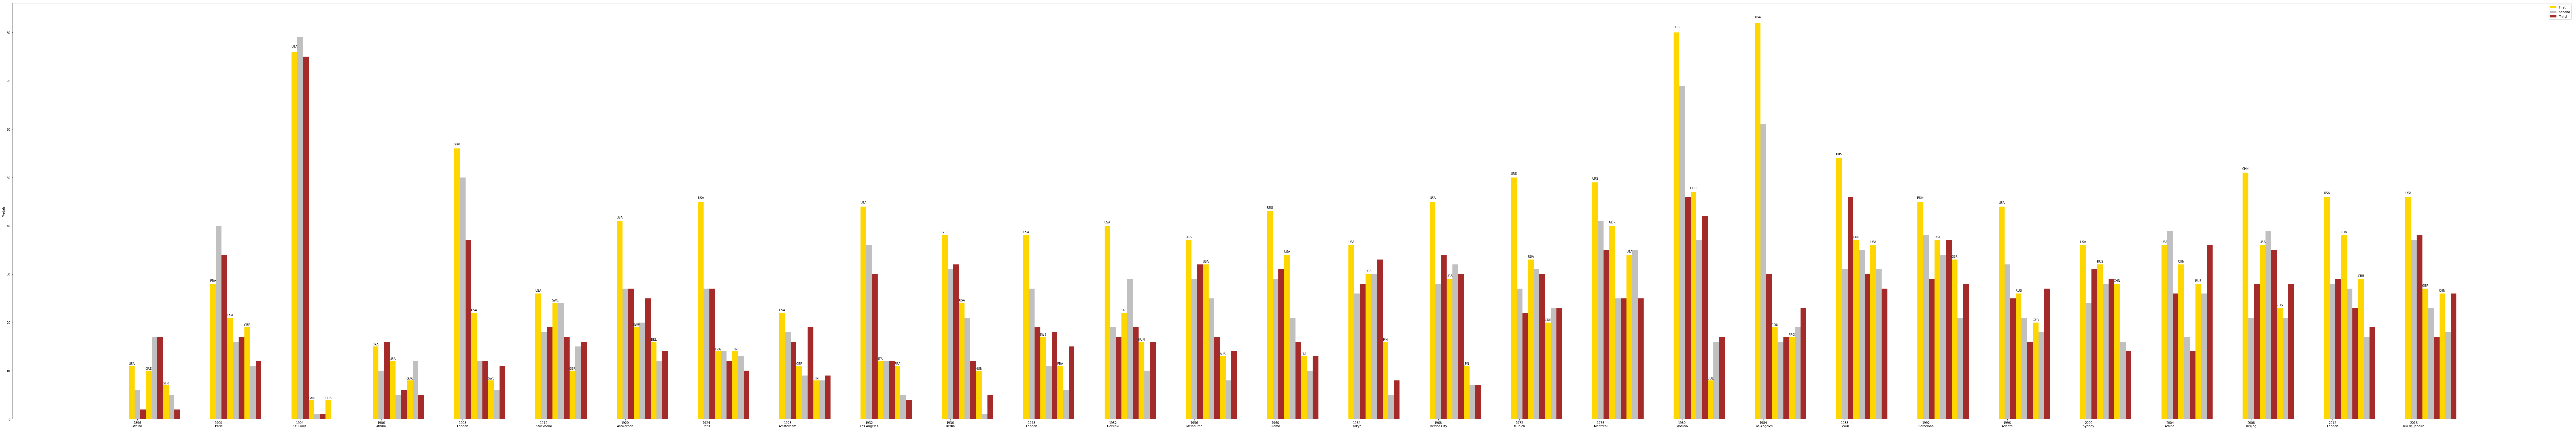

In [18]:
#FINAL GRAPH, each group of bars represent and olympic summer game, the yellow ones are the number of golds, silver
#the number of silver medals, and brown for bronze medals, the countries are sorted by gold medals, then by silver and
#finally bronze, you can also see the code of each country instead of the name, each year has the name of the city that
#hosted that olympic summer game
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(25)
fig.set_figwidth(150)

N = 29
ind = np.arange(0,N*2,2)  # the x locations for the groups
width = 0.14

rects_first_gold = ax.bar(ind, number_first_places_gold, width, color='gold')
rects_first_silver = ax.bar(ind+width, number_first_places_silver, width, color='silver')
rects_first_bronze = ax.bar(ind+width*2,number_first_places_bronze, width, color='brown')

rects_second_gold = ax.bar(ind+width*3, number_second_places_gold, width, color='gold')
rects_second_silver = ax.bar(ind+width*4, number_second_places_silver, width, color='silver')
rects_second_bronze = ax.bar(ind+width*5,number_second_places_bronze, width, color='brown')

rects_third_gold = ax.bar(ind+width*6, number_third_places_gold, width, color='gold')
rects_third_silver = ax.bar(ind+width*7, number_third_places_silver, width, color='silver')
rects_third_bronze = ax.bar(ind+width*8,number_third_places_bronze, width, color='brown')

ax.set_ylabel('Medals')
ax.set_xticks(ind+width)
ax.set_xticklabels( labels_graph  )
ax.legend( (rects_first_gold[0], rects_first_silver[0], rects_first_bronze[0]), ('First', 'Second', 'Third') )

def autolabel(rects,labels):
    for i in range(0,len(rects)):
        h = rects[i].get_height()
        text = labels[i]
        ax.text(rects[i].get_x()+rects[i].get_width()/2., 1.01*h, text,
                ha='center', va='bottom')
    
autolabel(rects_first_gold,names_first_places)
autolabel(rects_second_gold,names_second_places)
autolabel(rects_third_gold,names_third_places)

